In [1]:
# Importing libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
pd.options.mode.chained_assignment = None
sns.set(style='white', color_codes=True)
sns.set(font_scale=1.5)

Problem Statement: The sinking of the Titanic is one of the biggest maritime disaster in the history, killing 1502 out of 2224 
passengers and the crew. One of the reasons for such loss was that there were not enough lifeboats. Some groups of people 
were more likely to survive than others, such as women, children, and the upper-class.

Objective:
Use logistic regression to predict the survival of a given passenger based on features, such as sex, age

In [94]:
# Importing train data

train_df = pd.read_csv('train.csv')

In [95]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
# Checking for missing values
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin has almost 80% missing values. It is better to drop this column

In [99]:
# PassengerId, Name, Ticket are not useful information to check for survival ratio. So, we will drop all these columns

train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [100]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


From the above, we could say that, the younger the passenger is, the more or like it is for them to be in 3rd class. The older the passenger is, the more or like it is for them to be in 1st class.

In [105]:
# To deal with missing vales in Age variable

# Writing a function to find each null value in Age Variable

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [106]:
train_df.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.0,0.416667,0.356481,84.154687
2,0.472826,29.0,0.402174,0.380435,20.662183
3,0.242363,24.0,0.615071,0.393075,13.675550


In [107]:
train_df['Age'] = train_df[['Age','Pclass']].apply(age_approx, axis = 1)

In [108]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [109]:
# Drpping Embarked missing values

train_df.dropna(inplace=True)

In [111]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [44]:
train_df.Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

There are 342 survivals and 549 are dead

In [45]:
train_df.Sex.value_counts()

male      124
female     53
Name: Sex, dtype: int64

There are total of 577 males and 314 females

In [46]:
train_df.Embarked.value_counts()

S    90
Q    49
C    38
Name: Embarked, dtype: int64

There are a total of 644 passengers are boarded from South Hampton, 168 from Cherboung, 77 from Queenstown.

In [112]:
# Converting Sex from categorical into numeric using get_dummies

train_df_dummied = pd.get_dummies(train_df, columns=['Sex'])

In [113]:
train_df = pd.get_dummies(train_df_dummied, columns=['Embarked'])

In [114]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,24.0,1,0,7.2500,0,1,0,0,1
1,1,1,37.0,1,0,71.2833,1,0,1,0,0
2,1,3,24.0,0,0,7.9250,1,0,0,0,1
3,1,1,37.0,1,0,53.1000,1,0,0,0,1
4,0,3,24.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

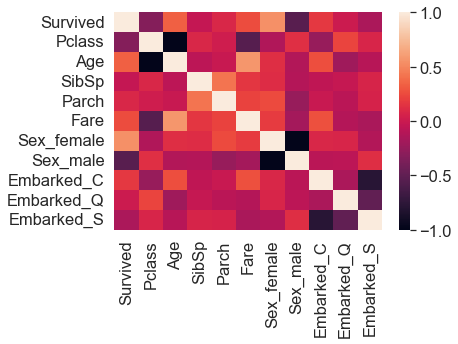

In [115]:
# Check whether variables are correlated or not

plt.plot(figsize = (16, 8))
sns.heatmap(train_df.corr())

As we can see, there is a strong correlation among Survived and Sex_Female

In [116]:
X = train_df.drop(['Survived', 'Fare'], axis =1)
Y = train_df.Survived

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [118]:
from sklearn.linear_model import LogisticRegression

LOGREG = LogisticRegression()

In [119]:
LOGREG.fit(X_train, y_train)

C:\Users\Siddhu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
Predictions = LOGREG.predict(X_test)

In [121]:
Predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Predictions)

array([[138,  29],
       [ 25,  75]], dtype=int64)

In [123]:
from sklearn import metrics

In [124]:
metrics.accuracy_score(y_test, Predictions)

0.797752808988764

In [125]:
len(X_test)

267

In [128]:

print(metrics.classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [129]:
LOGREG.coef_

array([[-0.5819916 ,  0.03629319, -0.25320655,  0.01170117,  1.43615711,
        -1.18960572,  0.470706  , -0.02622121, -0.1979334 ]])

In [130]:
LOGREG.intercept_

array([0.20262578])